<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/AnaliseDadosRV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       col_0  col_1                 col_2  col_3 col_4  col_5 col_6 col_7  \
0   Feminino  25-34  Não tenho  a certeza      5   Não    2.0   NaN   NaN   
1   Feminino  25-34                   Sim      5   Não    1.0   NaN   NaN   
2   Feminino  25-34                   Sim      4   Não    1.0   NaN   NaN   
3  Masculino  35-44                   Sim      1   Não    1.0   NaN   NaN   
4  Masculino  19-24                   Sim      5   Não    5.0   NaN   NaN   

                                               col_8 col_9  ... col_39 col_40  \
0  Realismo visual, Interação com o ambiente virt...   NaN  ...      4      4   
1  Realismo visual, Interação com o ambiente virt...   NaN  ...      5      4   
2                                    Realismo visual   NaN  ...      3      3   
3                                    Realismo visual   NaN  ...      3      2   
4  Realismo visual, Interação com o ambiente virt...   NaN  ...      5      5   

  col_41 col_42 col_43 col_44 col_45  col_46  \
0 

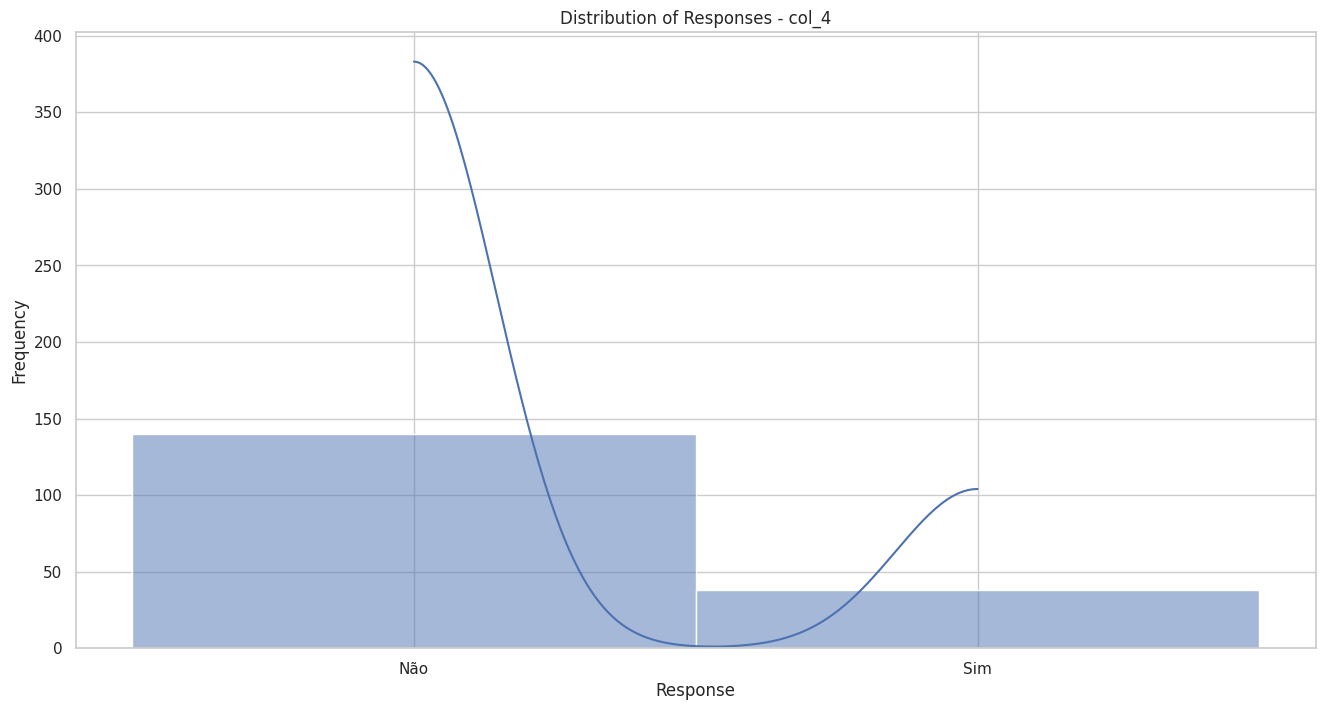

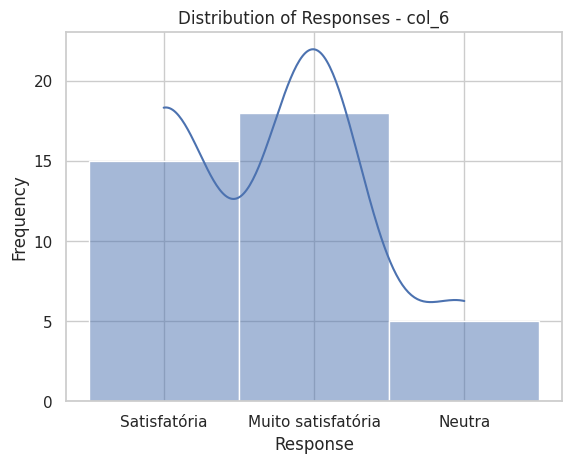

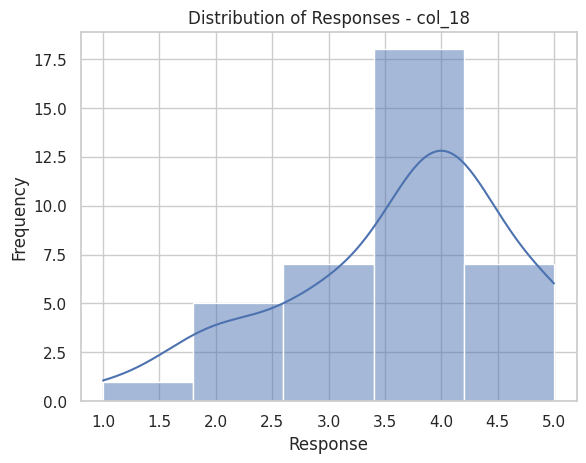

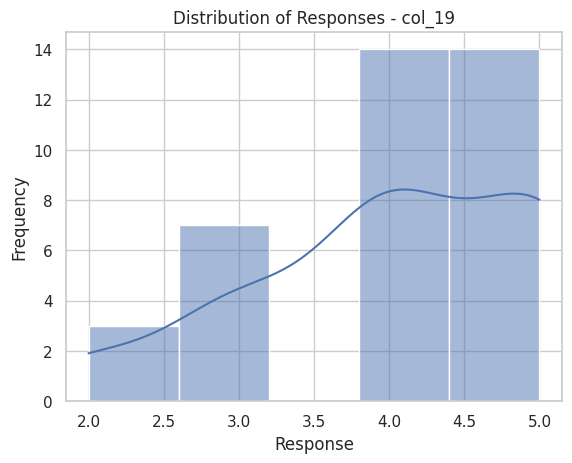

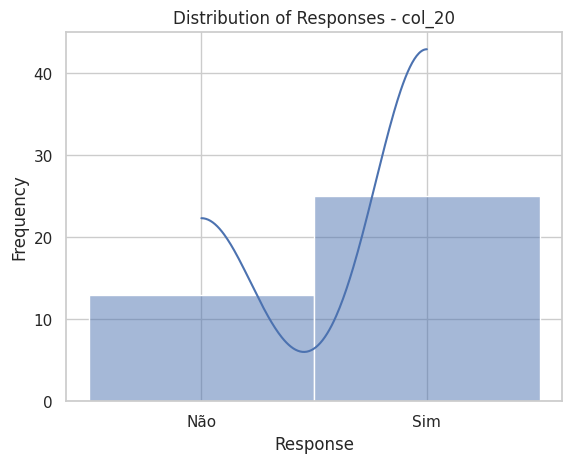

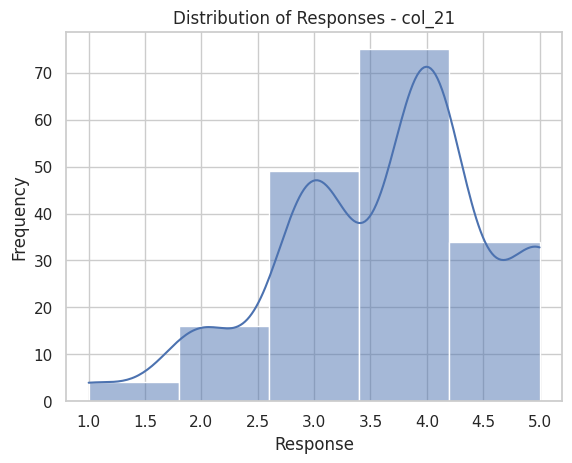

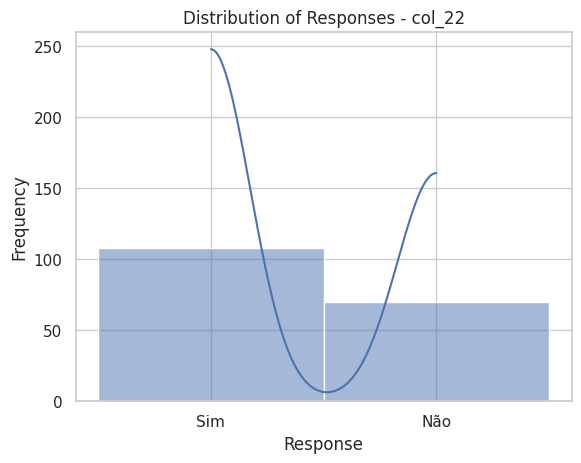

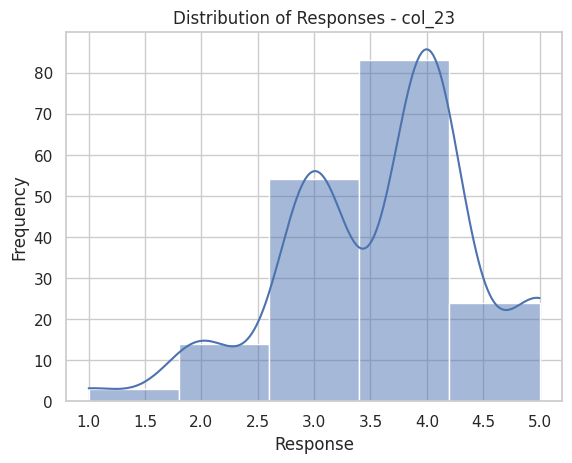

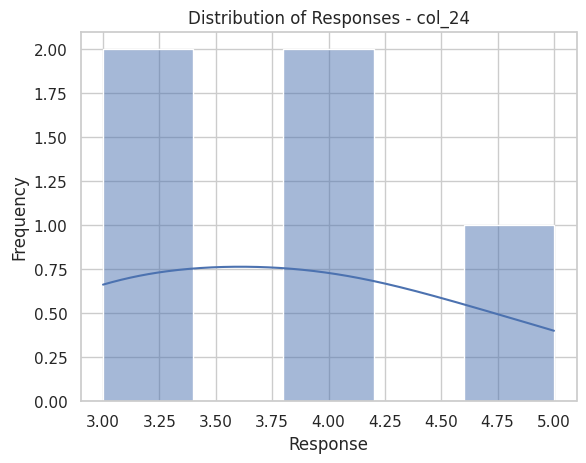

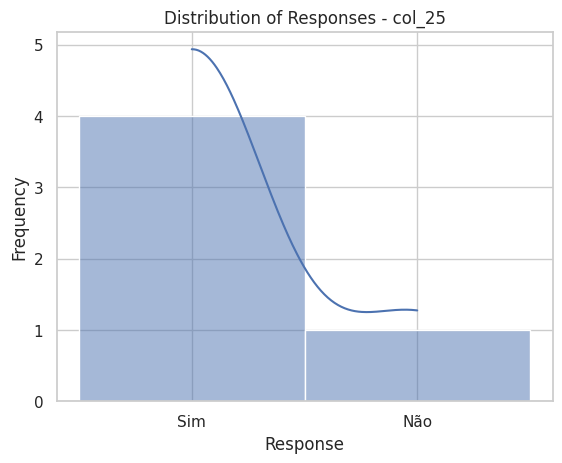

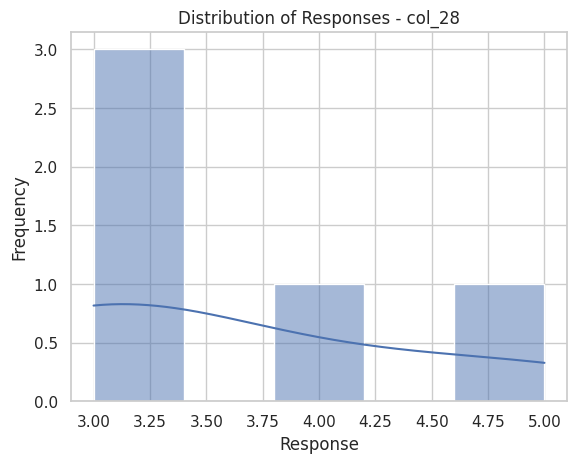

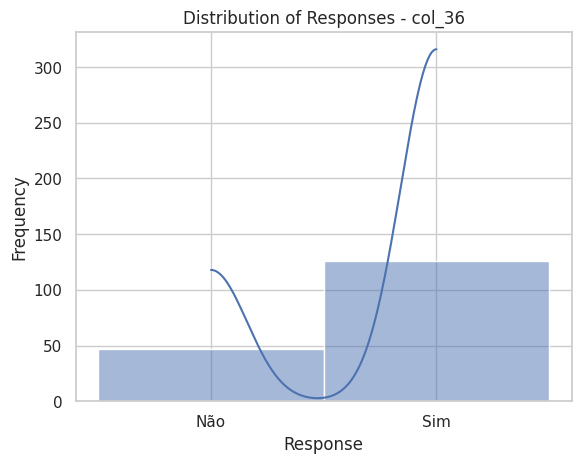

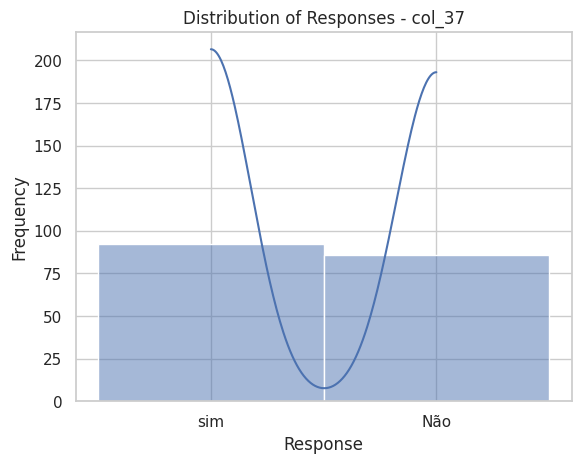

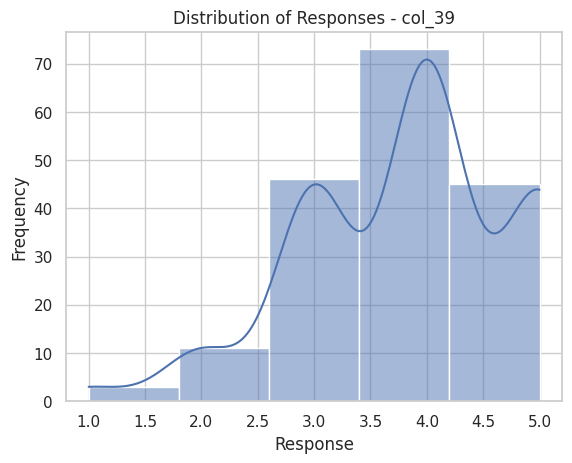

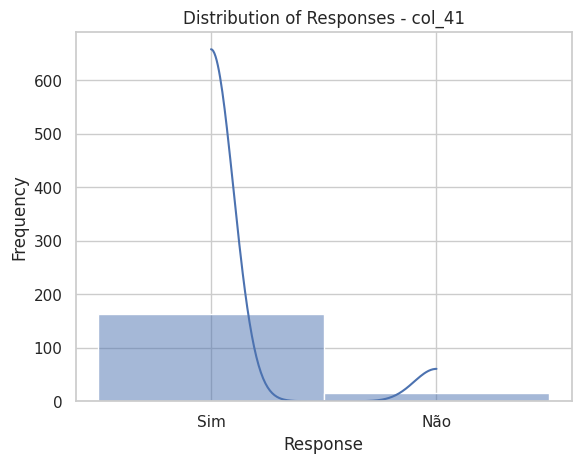

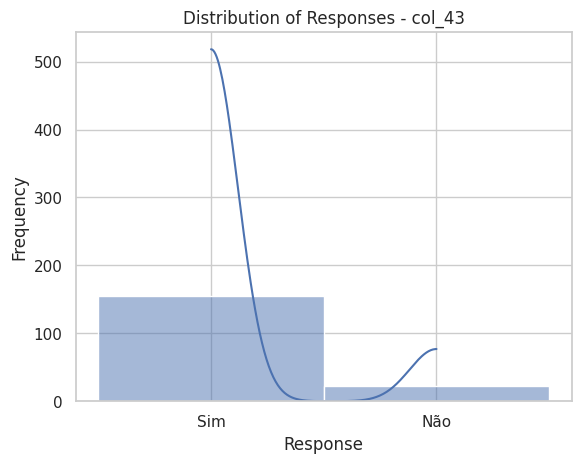

<ipython-input-42-ac5ffa3a57d5>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data.replace({'Sim': 1, 'Não': 0}, inplace=True)
<ipython-input-42-ac5ffa3a57d5>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data.fillna(0, inplace=True)
<ipython-input-42-ac5ffa3a57d5>:60: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  binary_ratios = binary_data.sum() / len(binary_data)


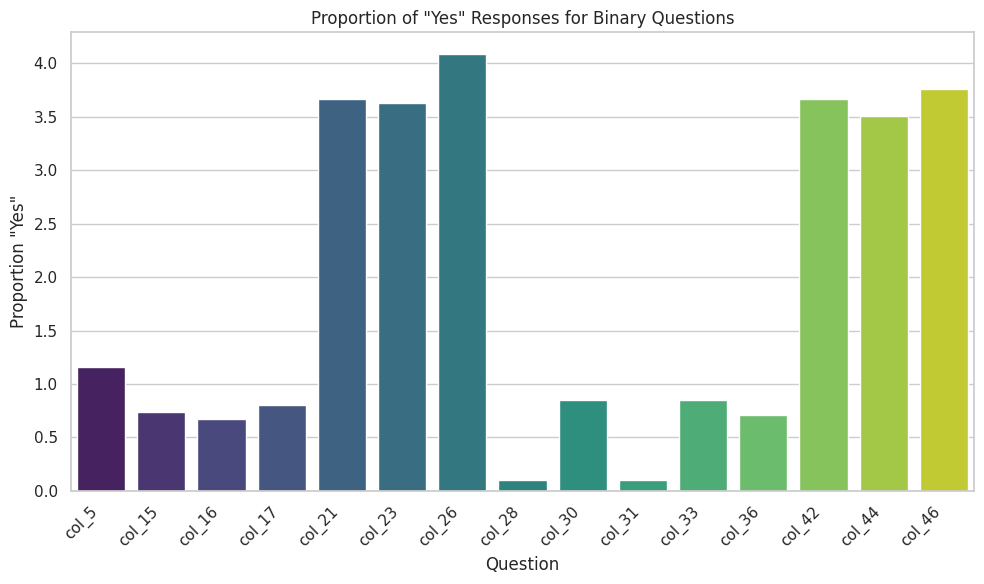

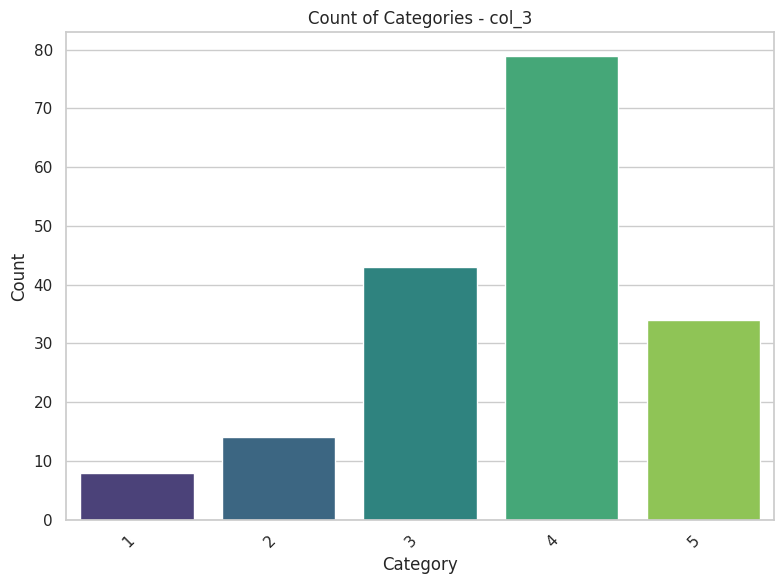

<ipython-input-42-ac5ffa3a57d5>:83: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


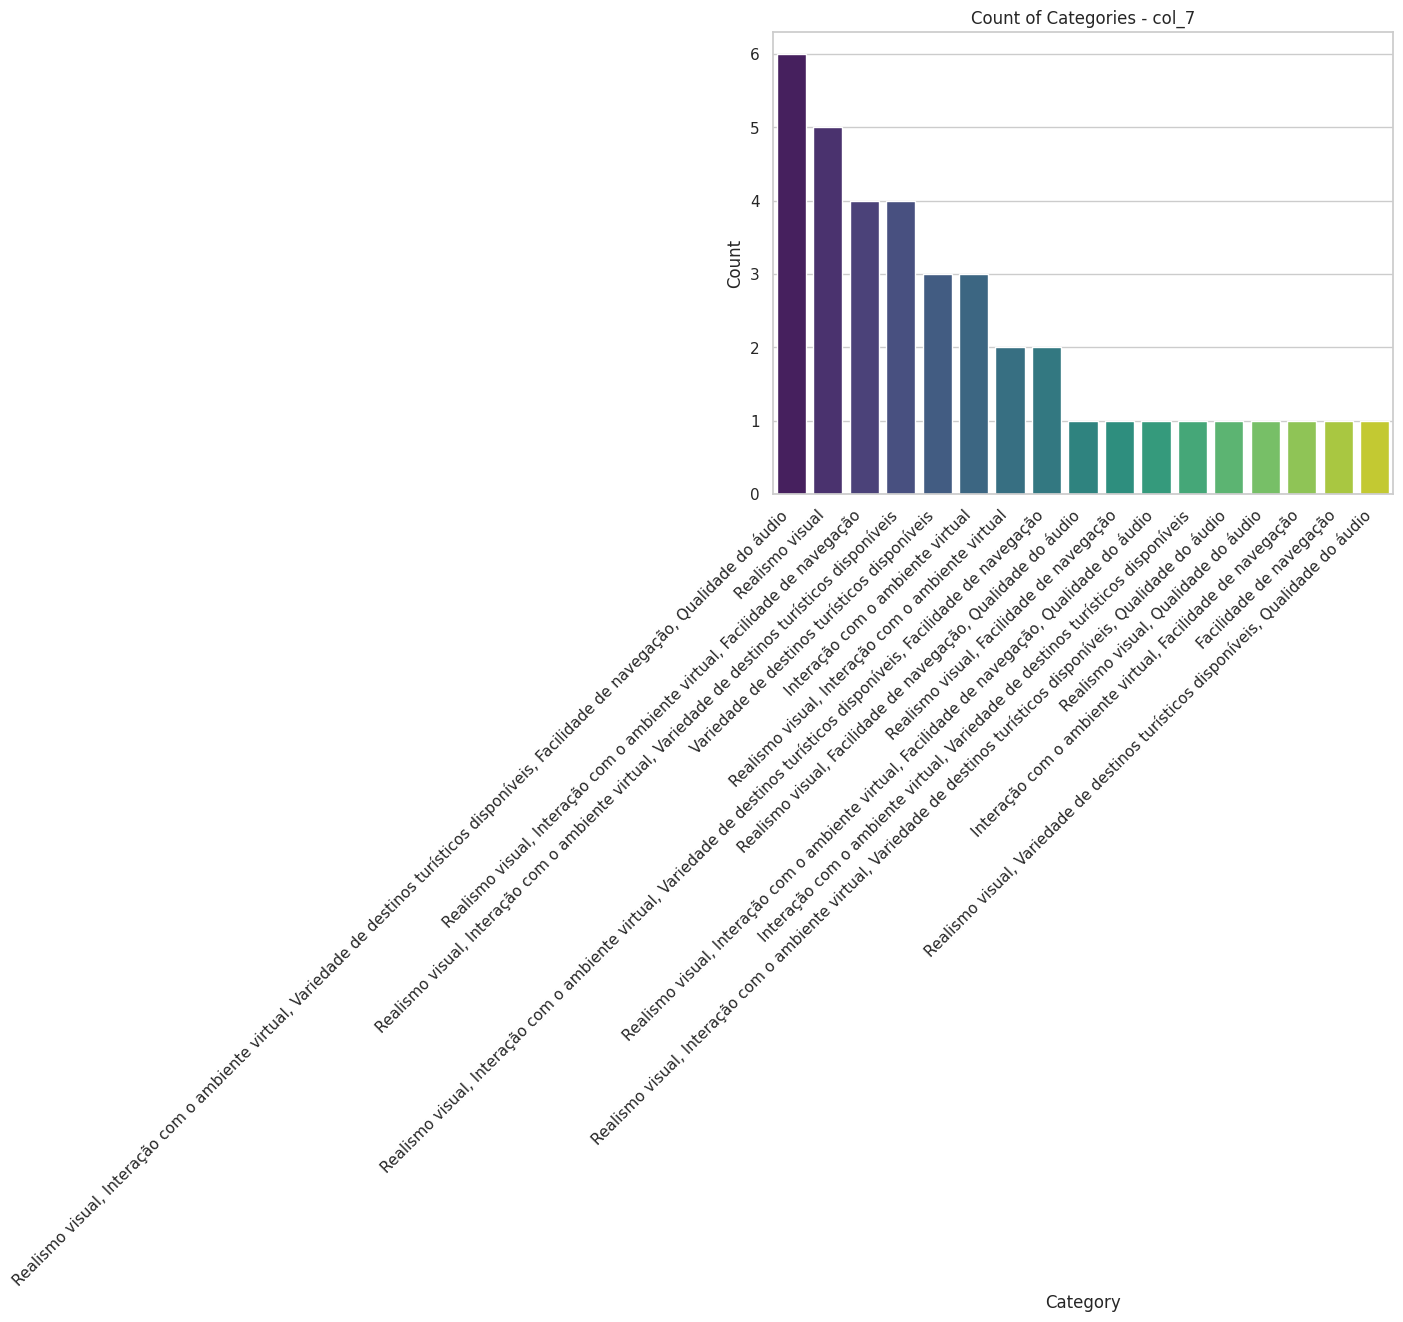

<ipython-input-42-ac5ffa3a57d5>:83: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


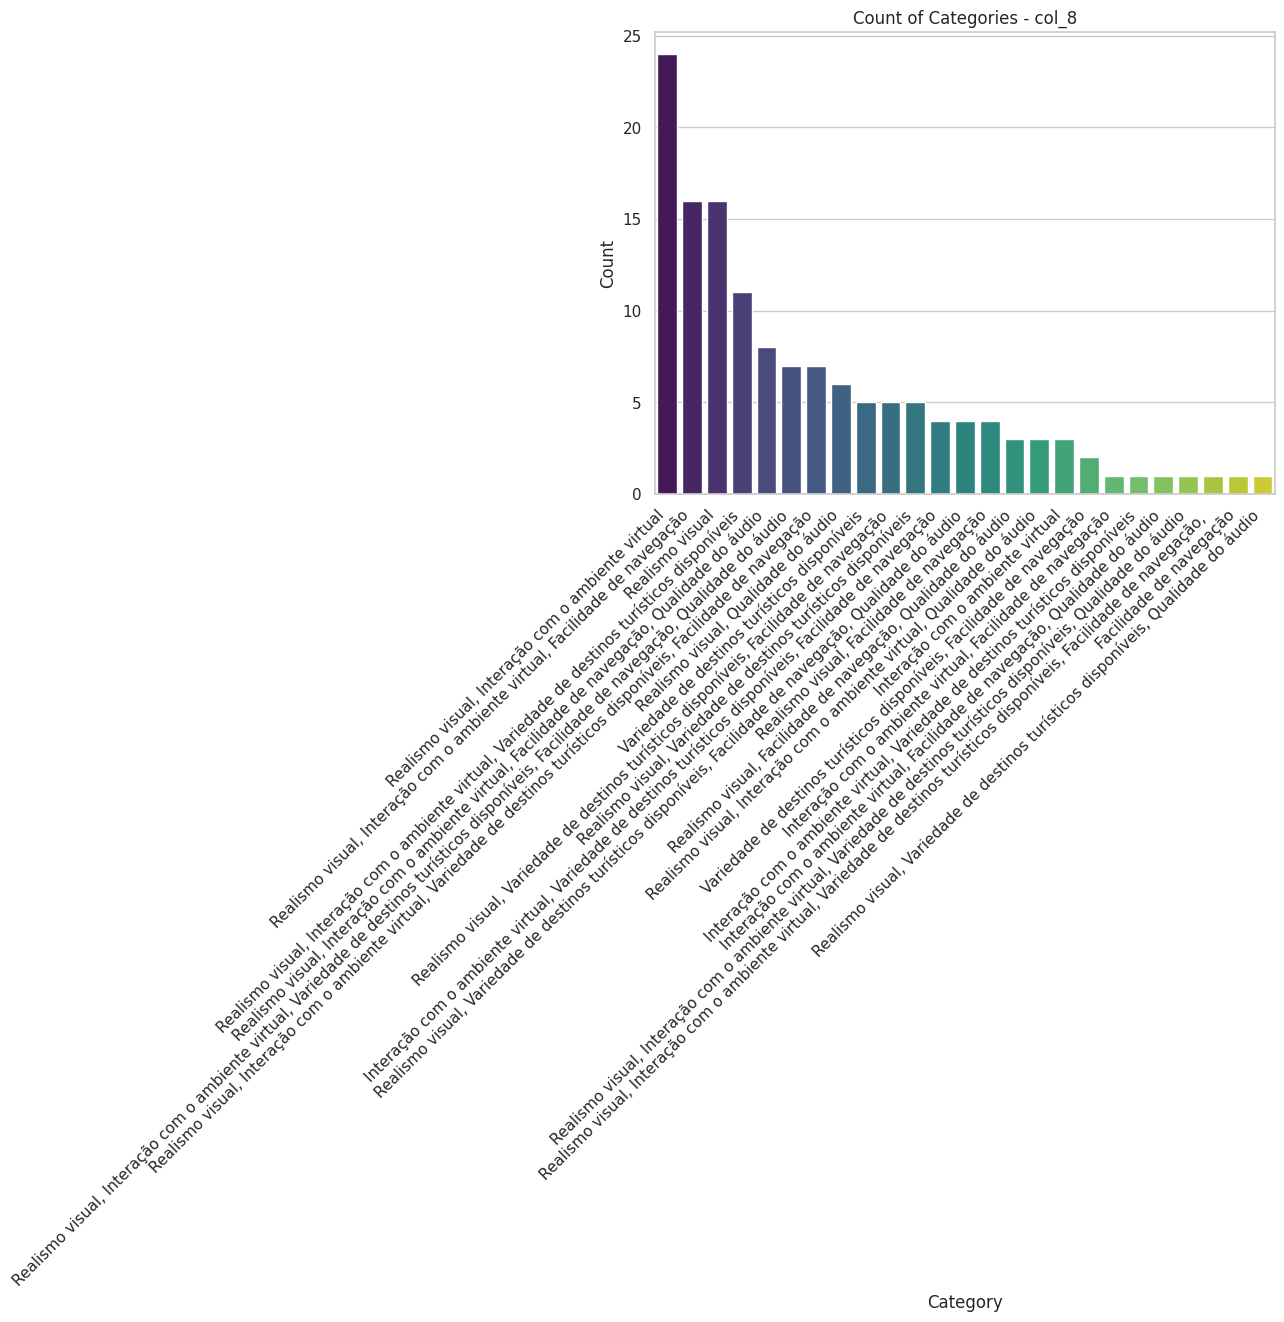

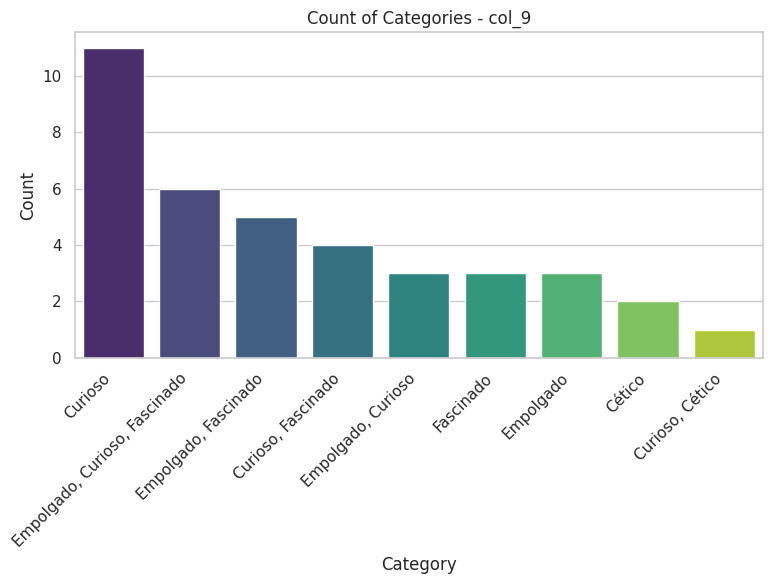

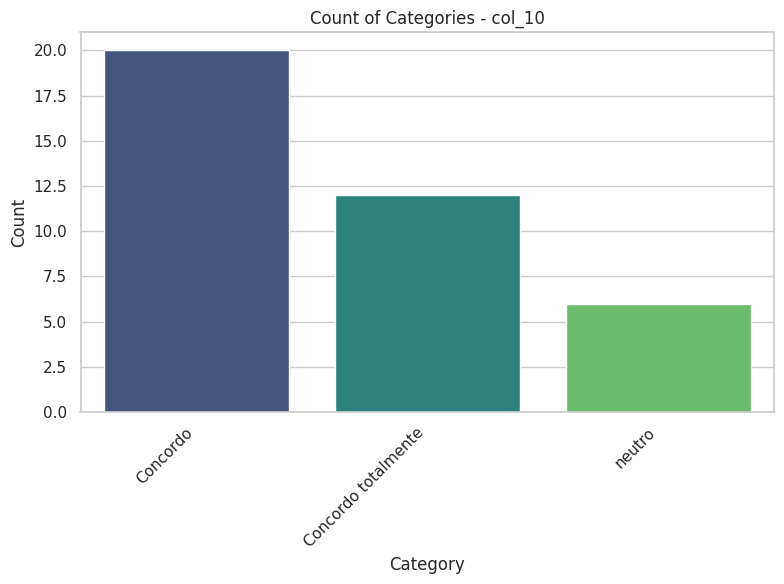

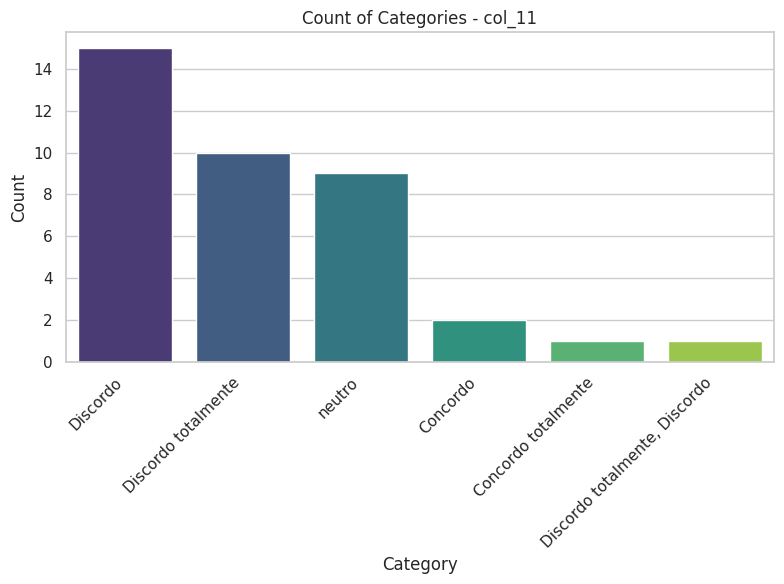

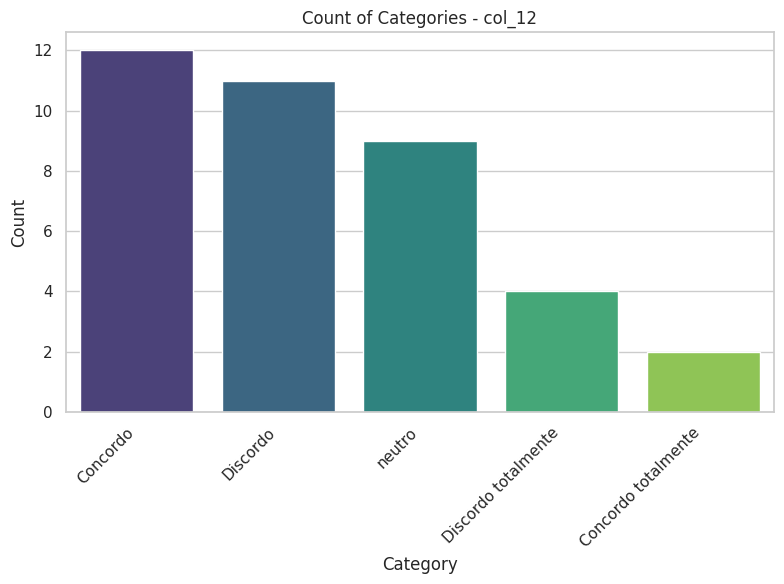

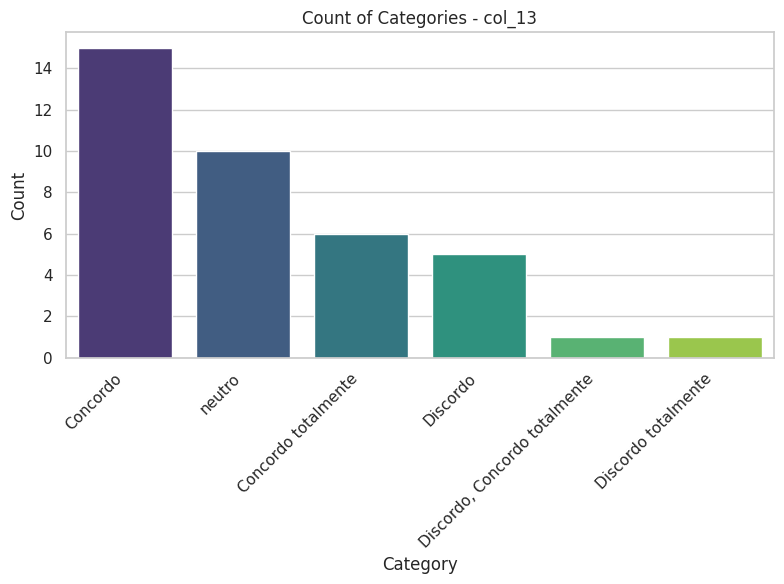

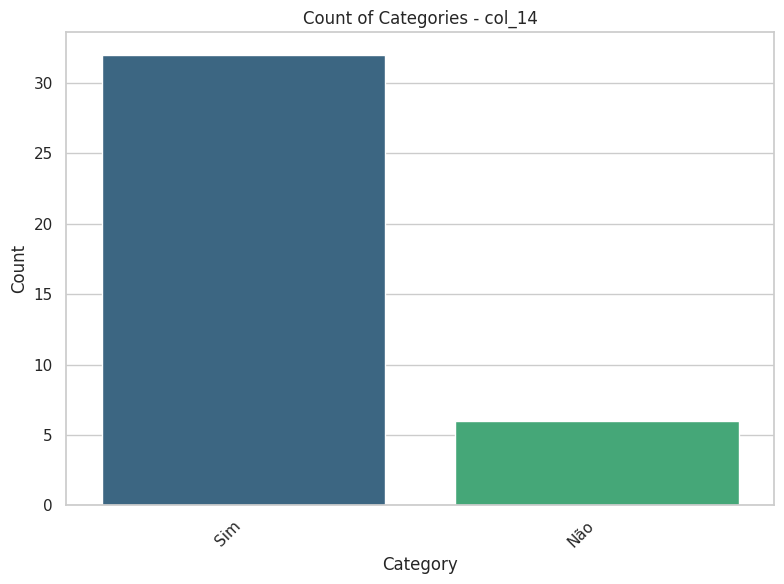

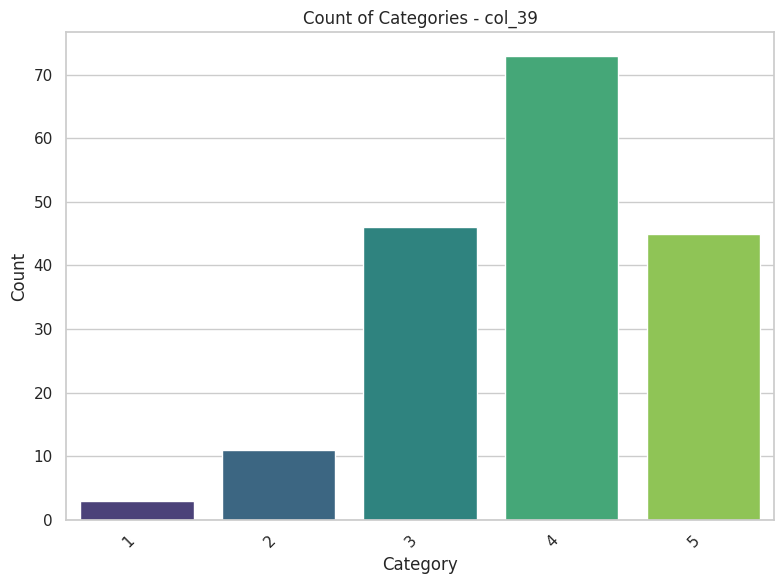

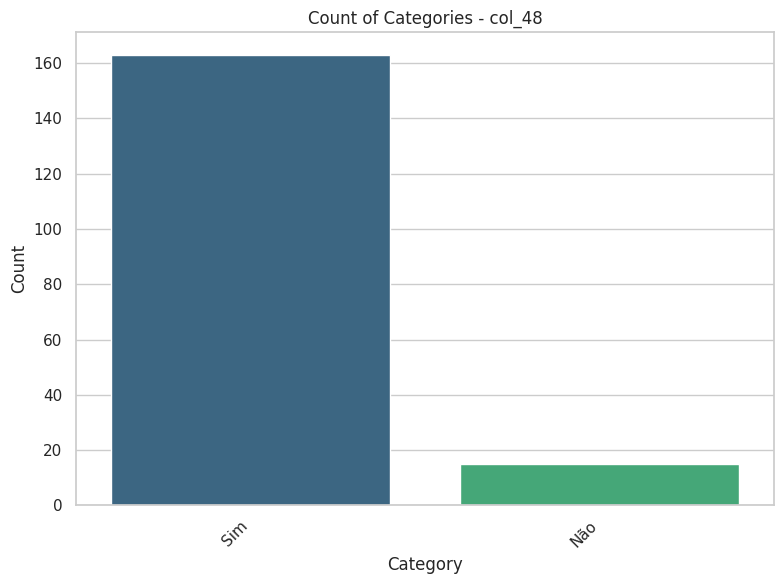

KeyError: ignored

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel data file
excel_file = 'respostas.xlsx'
df = pd.read_excel(excel_file)

# Reset columns for clarity
df.columns = [f'col_{i}' for i in range(df.shape[1])]

# Display the first few rows for inspection
print(df.head())

# Descriptive statistics
desc_stats = df.describe(include='all')
print(desc_stats)

# Assuming columns from col_4 to col_43 are Likert scale columns (based on the data snippet you shared)
likert_column_indices = [4,6,18,19,20,21,22,23,24,25,28,36,37,39,41,43]

# Handling NaN values for the Likert scale columns
#df[likert_column_indices] = df[likert_column_indices].fillna(0)

# Before plotting, verify if the columns pointed by likert_column_indices contain the expected data
for col in likert_column_indices:
    print(f"Column Name: {df.columns[col]}, NaN Values: {df[df.columns[col]].isna().sum()}")

# Plotting histograms for each Likert scale column
plt.figure(figsize=(16, 8))
for col in likert_column_indices:
    column_name = df.columns[col]
    sns.histplot(data=df, x=column_name, bins=5, kde=True)
    plt.title(f'Distribution of Responses - {column_name}')
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.show()

# The remaining code (for binary and categorical responses) can be similarly adjusted.

# Analysis for binary responses

#binary_column_indices = [5, 15, 16, 17, 21, 23, 26, 28, 30, 31, 33, 34, 36, 37, 38, 42, 44, 46, 49]
binary_column_indices = [5, 15, 16, 17, 21, 23, 26, 28, 30, 31, 33, 34, 36, 37, 38, 42, 44, 46]

max_index = len(df.columns) - 1
invalid_indices = [i for i in binary_column_indices if i > max_index]

if invalid_indices:
    print(f"Invalid column indices: {invalid_indices}")
    raise ValueError("Invalid column indices found!")

binary_data = df.iloc[:, binary_column_indices]

binary_data.replace({'Sim': 1, 'Não': 0}, inplace=True)

binary_data.fillna(0, inplace=True)

binary_ratios = binary_data.sum() / len(binary_data)

plt.figure(figsize=(10, 6))
sns.barplot(x=binary_ratios.index, y=binary_ratios.values, palette="viridis")
plt.title('Proportion of "Yes" Responses for Binary Questions')
plt.xlabel('Question')
plt.ylabel('Proportion "Yes"')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

categorical_column_indices = [3, 7, 8, 9, 10, 11, 12, 13, 14, 39, 48]

for index in categorical_column_indices:
    categorical_data = df.iloc[:, index]
    categorical_counts = categorical_data.value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=categorical_counts.index, y=categorical_counts.values, palette="viridis")
    plt.title(f'Count of Categories - {df.columns[index]}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Analysis by segments (e.g., gender or age)
# Assuming 'Sexo' is a column name in your dataset for gender.
# If not, adjust this as per your dataset.
analise_por_genero = df.groupby('Sexo')[df.columns[likert_column_indices]].mean()

print("Analysis by Gender:")
print(analise_por_genero)
